# Without Tensorflow

In [16]:
import csv
from PIL import Image # pip install Pillow
import numpy as np
from matplotlib import pyplot
from os import path
import pandas as pd

np.random.seed(0)

In [4]:
NUM_PEOPLE_TO_READ_IN = 100
TEST_RATIO = 0.20;

In [5]:
data = {
    "images":np.empty((NUM_PEOPLE_TO_READ_IN*4,50,50,3)),
    "X":np.empty((NUM_PEOPLE_TO_READ_IN*4,50*50*3)),
    "Y":np.empty((NUM_PEOPLE_TO_READ_IN*4))
}

counter = 0
with open('metadata.csv', newline='') as csvfile:
    rows = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in tuple(rows)[1:]:
        
        mask_type = int(row[1])
        filename = row[5]
        
        try:
            image = np.array(Image.open(path.join("data", str(mask_type), filename))) / 255.0
        except FileNotFoundError:
            image = np.zeros([50,50,3]) # USED FOR DISPLAYING NICELY BELOW / TODO: MAKE SURE TO FILTER THESE AT SOME POINT
            
        data["images"][counter] = image
        data["X"][counter] = np.reshape(image, 50*50*3)
        data["Y"][counter] = mask_type
        
        counter += 1
        if(counter >= NUM_PEOPLE_TO_READ_IN*4):
            break
            
    data["images"] = data["images"]
    data["X"] = data["X"]
    data["Y"] = data["Y"].astype("int")

In [6]:
print(data["images"].shape)
print(data["X"].shape)
print(data["Y"].shape)

(400, 50, 50, 3)
(400, 7500)
(400,)


In [8]:
pd.DataFrame(data["X"])

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.600000,0.478431,0.458824,0.623529,0.501961,0.482353,0.639216,0.521569,0.490196,0.658824,...,0.031373,0.439216,0.207843,0.231373,0.403922,0.160784,0.180392,0.376471,0.133333,0.152941
1,0.647059,0.529412,0.529412,0.658824,0.541176,0.541176,0.670588,0.560784,0.556863,0.686275,...,0.094118,0.505882,0.231373,0.270588,0.533333,0.243137,0.294118,0.478431,0.188235,0.239216
2,0.698039,0.627451,0.611765,0.709804,0.639216,0.623529,0.729412,0.650980,0.647059,0.741176,...,0.156863,0.400000,0.227451,0.278431,0.529412,0.309804,0.360784,0.447059,0.211765,0.258824
3,0.756863,0.717647,0.721569,0.772549,0.733333,0.737255,0.788235,0.729412,0.749020,0.800000,...,0.321569,0.372549,0.172549,0.231373,0.239216,0.078431,0.141176,0.305882,0.164706,0.219608
4,0.800000,0.749020,0.686275,0.788235,0.737255,0.674510,0.827451,0.764706,0.713725,0.831373,...,0.137255,0.211765,0.176471,0.117647,0.207843,0.180392,0.117647,0.211765,0.184314,0.121569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.192157,0.113725,0.086275,0.223529,0.145098,0.117647,0.192157,0.113725,0.086275,0.192157,...,0.450980,0.286275,0.364706,0.254902,0.247059,0.337255,0.227451,0.349020,0.439216,0.329412
396,0.117647,0.231373,0.215686,0.121569,0.235294,0.219608,0.141176,0.239216,0.223529,0.149020,...,0.133333,0.454902,0.090196,0.129412,0.509804,0.141176,0.196078,0.419608,0.058824,0.117647
397,0.101961,0.215686,0.200000,0.105882,0.219608,0.203922,0.101961,0.215686,0.200000,0.098039,...,0.247059,0.294118,0.243137,0.313725,0.349020,0.137255,0.192157,0.384314,0.086275,0.133333
398,0.054902,0.082353,0.050980,0.054902,0.094118,0.058824,0.058824,0.098039,0.054902,0.050980,...,0.058824,0.137255,0.003922,0.007843,0.125490,0.011765,0.019608,0.137255,0.035294,0.039216


In [9]:
pd.DataFrame(data["Y"], columns=np.array(["Y"]))

,Y
0,1
1,2
2,3
3,4
4,1
...,...
395,4
396,1
397,2
398,3


In [7]:
# Maximum of 10000 people (~240MB for .ipynb file) for full dataset
# Maximum of about 1045 people (25MB for .ipynb file) for Jupyter Notebook
# Maximum of about 4180 people (100MB for .ipynb file) for github upload
NUM_PEOPLE_TO_PLOT=100

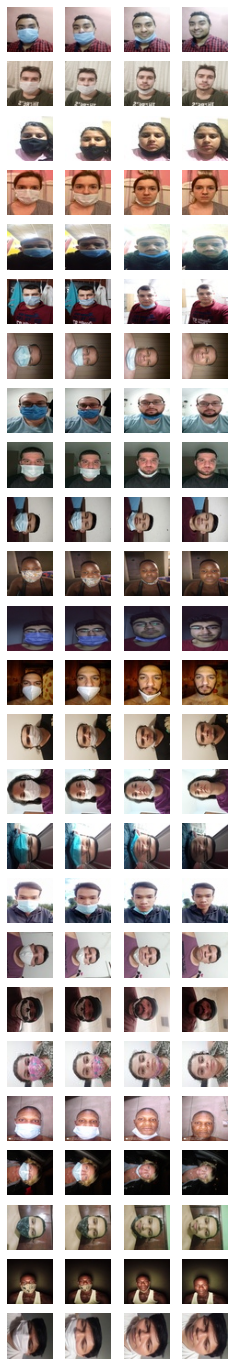

In [8]:
pyplot.figure(figsize=(4, NUM_PEOPLE_TO_PLOT))
counter = 0
for img in data["images"]:
    pyplot.subplot(NUM_PEOPLE_TO_PLOT, 4, counter+1)
    pyplot.axis("off")
    pyplot.imshow(img)
    counter += 1
    if(counter >= NUM_PEOPLE_TO_PLOT):
        break;
    

In [10]:
shuffler = np.random.permutation(NUM_PEOPLE_TO_READ_IN*4)

cut_index = int(NUM_PEOPLE_TO_READ_IN*4*TEST_RATIO)

x_scaled = data["X"]*2-1

x_shuffled = x_scaled[shuffler]
y_shuffled = data["Y"][shuffler]

x_train = x_shuffled[cut_index:]
x_test = x_shuffled[0:cut_index]

y_train = y_shuffled[cut_index:]
y_test = y_shuffled[0:cut_index]


In [11]:
print(data["images"].shape)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(400, 50, 50, 3)
(320, 7500)
(80, 7500)
(320,)
(80,)


In [15]:
class Weight:
    def __init__(self, shape):
        self.shape = shape
        self.weights = np.random.rand(self.shape)
        
    def update(self):
        

class Neuron:
    def __init__(self, shape, input1):
        self.shape = shape
        for input in self.shape[0]:
            self.input = input1
            self.z = 
        
    def activate(self):
        return 1/(1 + np.exp(-x))

IndentationError: expected an indented block (3959490579.py, line 9)

In [22]:
def sigmoid(x):
        return 1/(1 + np.exp(-x))

In [18]:
def layerSizes(X):
    """
    X -- input data
    """
    input_layer_size = X.shape[0]
    hidden_layer_size = 4
    output_layer_size = 1
    
    """
    Returns:
    input_layer_size -- the size of the input layer
    hidden_layer_size -- the size of the hidden layer
    output_layer_size -- the size of the output layer
    """
    
    return input_layer_size, hidden_layer_size, output_layer_size
input_layer_size, hidden_layer_size, output_layer_size = layerSizes(x_train)

In [20]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    input_size-- size of the input layer
    hidden_size -- size of the hidden layer
    output_size-- size of the output layer
    """
    
    Weight1 = np.random.rand(hidden_size, input_size+1) # have the W1 diminsions defined here, the return should be a matrix initalized randomly.  
    Weight2 = np.random.rand(output_size, hidden_size+1) # have the W2 diminsions defined here, the return should be a matrix initalized randomly.
    
    parameters = {'Weight1' : Weight1, 'Weight2' : Weight2}
    
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix 1
                    W2 -- weight matrix 2 
    """
    return parameters
parameters = initialize_parameters(*layerSizes(x_train))

In [24]:
def forward_prop(X, parameters):
    """
    X -- input data
    parameters -- python dictionary containing your parameters (output of initialization function)
    """
    
    # Retrieve your weights from the "parameters" dictionary
    Weight1 = parameters['Weight1']
    Weight2 = parameters['Weight2']
    
   # Add bias term to X
    one = np.ones(X.shape[1])  
    X = np.vstack((one, X)) 
    
    # Compute pass from layer 1 to layer 2 and activation
    z2 = np.dot(Weight1, X) # add your code here
    a2 = sigmoid(z2) # add your code here
    
    # add bias term to a2
    one = np.ones(a2.shape[1])
    a2  = np.vstack((one, a2)) # add your code here
    
    
    # Compute pass from layer 2 to layer 3 and activation
    z3 = np.dot(Weight2, a2) # add your code here
    a3 = sigmoid(z3) # add your code here
    
    
    #The values will be needed for the backpropagation which are stored in cache. Later, it will be given to back propagation.
    cache = {"z2": z2,
             "a2": a2,
             "z3": z3,
             "a3": a3}
    """
    Returns:
    a3 -- The sigmoid output of the second activation
    cache -- a dictionary containing "z2", "a2", "z3" and "a3"
    """
    return np.array(a3), cache


print("Your output:\na3 =", forward_prop(x_train, parameters)[0])

Your output:
a3 = [[0.59693338 0.57324267 0.57253079 ... 0.5725291  0.5725291  0.5725291 ]]


# With Tensorflow

## Source: https://www.tensorflow.org/tutorials/images/classification

In [1]:
import tensorflow as tf
from matplotlib import pyplot
import numpy as np

2021-10-31 17:29:23.027443: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-31 17:29:23.027469: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory("data",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(50, 50),
  batch_size=32)

Found 39698 files belonging to 4 classes.
Using 31759 files for training.


2021-10-31 17:29:28.108267: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-31 17:29:28.108300: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-31 17:29:28.108327: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (benjamin-XPS-13-9370): /proc/driver/nvidia/version does not exist
2021-10-31 17:29:28.109386: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory("data",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(50, 50),
  batch_size=32)

Found 39698 files belonging to 4 classes.
Using 7939 files for validation.


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [6]:
num_classes = 4

model =  tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(50, 50, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0

In [9]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


2021-10-31 17:29:49.864636: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


993/993 [==============================] - 44s 40ms/step - loss: 0.8954 - accuracy: 0.5903 - val_loss: 0.6377 - val_accuracy: 0.7511
Epoch 2/15
993/993 [==============================] - 36s 37ms/step - loss: 0.5615 - accuracy: 0.7811 - val_loss: 0.4893 - val_accuracy: 0.8185
Epoch 3/15
993/993 [==============================] - 34s 34ms/step - loss: 0.4398 - accuracy: 0.8319 - val_loss: 0.4366 - val_accuracy: 0.8404
Epoch 4/15
993/993 [==============================] - 42s 43ms/step - loss: 0.3692 - accuracy: 0.8611 - val_loss: 0.4511 - val_accuracy: 0.8284
Epoch 5/15
993/993 [==============================] - 40s 40ms/step - loss: 0.3201 - accuracy: 0.8802 - val_loss: 0.3797 - val_accuracy: 0.8633
Epoch 6/15
993/993 [==============================] - 39s 39ms/step - loss: 0.2742 - accuracy: 0.8973 - val_loss: 0.4108 - val_accuracy: 0.8611
Epoch 7/15
993/993 [==============================] - 38s 38ms/step - loss: 0.2356 - accuracy: 0.9118 - val_loss: 0.3888 - val_accuracy: 0.8661
Epo

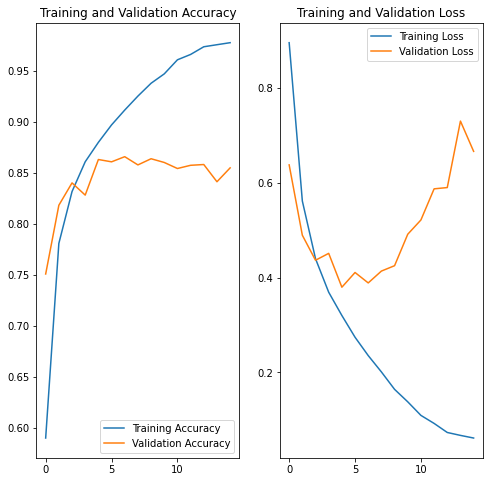

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

pyplot.figure(figsize=(8, 8))
pyplot.subplot(1, 2, 1)
pyplot.plot(epochs_range, acc, label='Training Accuracy')
pyplot.plot(epochs_range, val_acc, label='Validation Accuracy')
pyplot.legend(loc='lower right')
pyplot.title('Training and Validation Accuracy')

pyplot.subplot(1, 2, 2)
pyplot.plot(epochs_range, loss, label='Training Loss')
pyplot.plot(epochs_range, val_loss, label='Validation Loss')
pyplot.legend(loc='upper right')
pyplot.title('Training and Validation Loss')
pyplot.show()

In [11]:
class_names = ["Access Granted","Access Deniced - Please wear a mask over your nose.", "Access Denied - Please wear a mask over your mouth and nose.","Access Denied - Please wear a mask"]

In [12]:
def predict(file_path):

    img = tf.keras.utils.load_img(file_path, target_size=(50, 50))
    pyplot.imshow(img)

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])


    print(
        "{} ({:.2f}% confidence)"
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )


Access Denied - Please wear a mask (91.72% confidence)


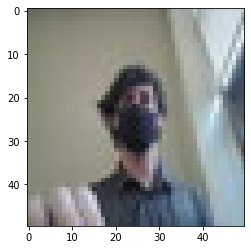

In [13]:
predict("faces/benjamin/1.jpg")

Access Deniced - Please wear a mask over your nose. (84.46% confidence)


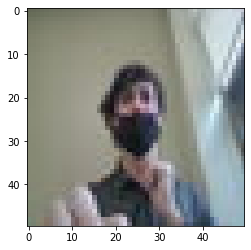

In [14]:
predict("faces/benjamin/2.jpg")

Access Denied - Please wear a mask (96.43% confidence)


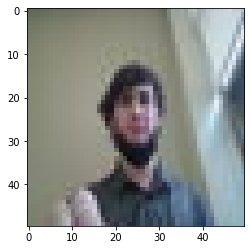

In [15]:
predict("faces/benjamin/3.jpg")

Access Denied - Please wear a mask (99.94% confidence)


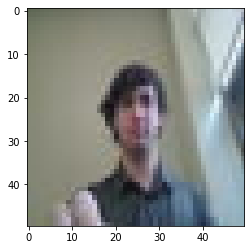

In [16]:
predict("faces/benjamin/4.jpg")

Access Granted (96.96% confidence)


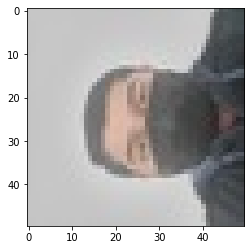

In [17]:
predict("faces/shaurya/1.jpg")

Access Deniced - Please wear a mask over your nose. (81.79% confidence)


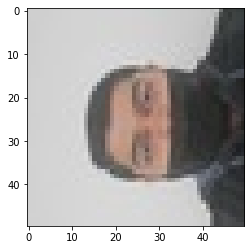

In [18]:
predict("faces/shaurya/2.jpg")

Access Denied - Please wear a mask over your mouth and nose. (97.58% confidence)


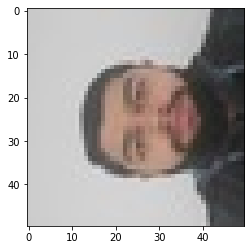

In [19]:
predict("faces/shaurya/3.jpg")

Access Denied - Please wear a mask (97.53% confidence)


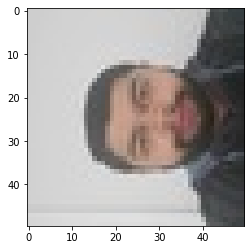

In [20]:
predict("faces/shaurya/4.jpg")

Access Granted (100.00% confidence)


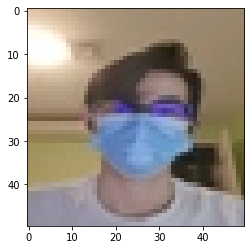

In [21]:
predict("faces/zunyi/1.jpg")

Access Deniced - Please wear a mask over your nose. (100.00% confidence)


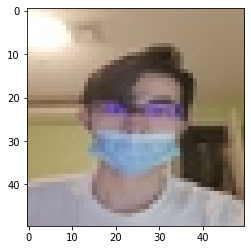

In [22]:
predict("faces/zunyi/2.jpg")

Access Denied - Please wear a mask over your mouth and nose. (99.68% confidence)


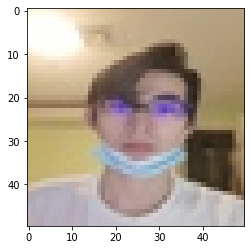

In [23]:
predict("faces/zunyi/3.jpg")

Access Denied - Please wear a mask (99.83% confidence)


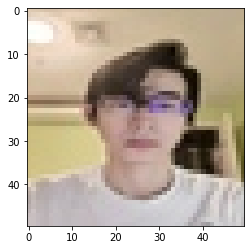

In [24]:
predict("faces/zunyi/4.jpg")

Access Denied - Please wear a mask (99.47% confidence)


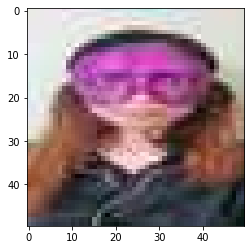

In [25]:
predict("faces/parisa/1.jpg")

Access Denied - Please wear a mask (99.03% confidence)


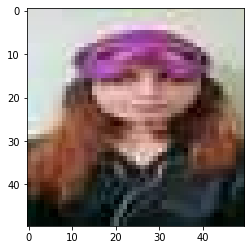

In [26]:
predict("faces/parisa/2.jpg")

Access Denied - Please wear a mask (89.43% confidence)


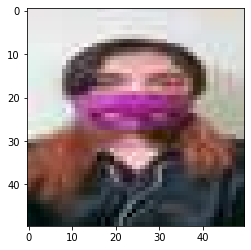

In [27]:
predict("faces/parisa/3.jpg")